**Name - Arihant Gupta**
<br>
**Enrolment - E23CSEU0055**
<br>
**Batch - EB_02**
<br>
**Date - 19 Aug 2025**
<br>
**Lab - 06**
<br>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

To load the data and print first 5 rows.

In [12]:
df = pd.read_csv("data\\Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Explore and visualize the dataset using different columns such as total number of 
people survived, survival rate based on gender, survival rate based on age (Hint: 
for age column create bins and divide age data into different categories).


Survival Rate based on Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


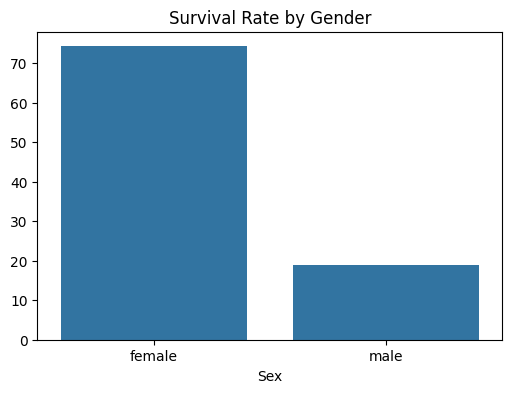

In [13]:
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate based on Gender:")
print(survival_by_gender)

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rate by Gender')
plt.show()


Survival Rate based on Age:
Age
0.42     100.0
0.67     100.0
0.75     100.0
0.83     100.0
0.92     100.0
         ...  
70.00      0.0
70.50      0.0
71.00      0.0
74.00      0.0
80.00    100.0
Name: Survived, Length: 88, dtype: float64


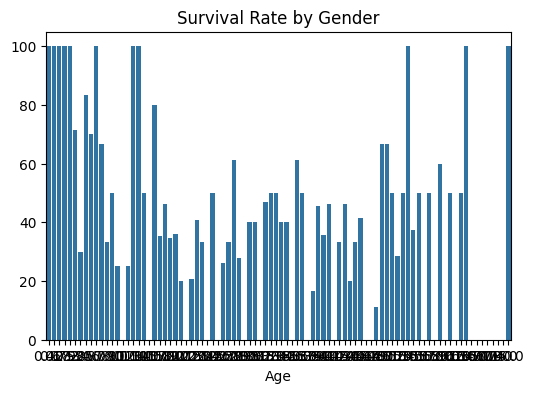

In [14]:
survival_by_age = df.groupby('Age')['Survived'].mean() * 100
print("\nSurvival Rate based on Age:")
print(survival_by_age)

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_age.index, y=survival_by_age.values)
plt.title('Survival Rate by Gender')
plt.show()


Survival Rate based on Age Group:
AgeGroup
Child          57.352941
Teenager       48.888889
Young Adult    36.885246
Adult          41.626794
Senior         26.923077
Name: Survived, dtype: float64


C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\2773926903.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100
C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\2773926903.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette='plasma')


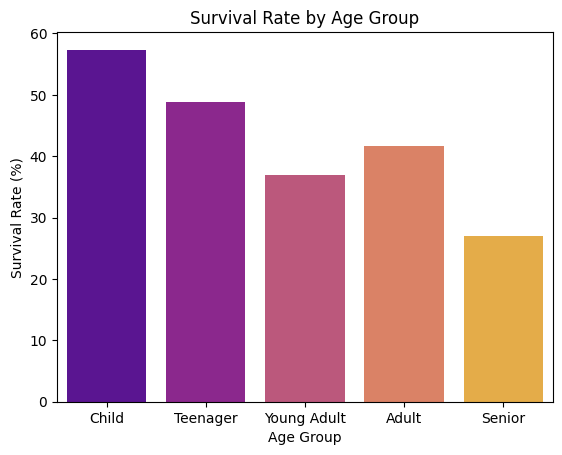

In [15]:
bins = [0, 12, 18, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival Rate based on Age Group:")
print(survival_by_age)

sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette='plasma')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.show()

Pre-process the data by dropping irrelevant columns, filling missing values, encoding 
categorical columns, etc. 

In [16]:
newdf = df[["Sex", "Age", "Fare", "Embarked", "Pclass", "Survived"]]
newdf["Embarked"].fillna(newdf["Embarked"].mode()[0], inplace=True)
print(newdf["Embarked"].isna().sum())

0


C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\1133132883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf["Embarked"].fillna(newdf["Embarked"].mode()[0], inplace=True)
C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\1133132883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["Embarked"].fillna(newdf["Embarked"].mode()[0],

Label Encoding and Fillna

In [17]:
lr = LabelEncoder()
newdf["Embarked"] = lr.fit_transform(newdf["Embarked"])
newdf["Sex"] = lr.fit_transform(newdf["Sex"])

newdf["Age"].fillna(newdf["Age"].mean(), inplace=True)

print(newdf)

     Sex        Age     Fare  Embarked  Pclass  Survived
0      1  22.000000   7.2500         2       3         0
1      0  38.000000  71.2833         0       1         1
2      0  26.000000   7.9250         2       3         1
3      0  35.000000  53.1000         2       1         1
4      1  35.000000   8.0500         2       3         0
..   ...        ...      ...       ...     ...       ...
886    1  27.000000  13.0000         2       2         0
887    0  19.000000  30.0000         2       1         1
888    0  29.699118  23.4500         2       3         0
889    1  26.000000  30.0000         0       1         1
890    1  32.000000   7.7500         1       3         0

[891 rows x 6 columns]


C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\1804564666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["Embarked"] = lr.fit_transform(newdf["Embarked"])
C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\1804564666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["Sex"] = lr.fit_transform(newdf["Sex"])
C:\Users\ariha\AppData\Local\Temp\ipykernel_6460\1804564666.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplac

4.	Define X matrix (independent features) and y vector (target feature).
5.	Split the dataset into training and testing subsets.
6.	Train Logistic Regression Model (from sklearn.linear_model import LogisticRegression). 

In [18]:
x = newdf[["Sex", "Age", "Fare", "Embarked", "Pclass"]]
y = newdf["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

7.	Print the classification metrics for train and test subsets.  

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

